# Sustain Trio

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA

file_path = '/Users/yunustopcu/Documents/GitHub/predictive-solar-supply-chain/power_usage_2016_to_2020.csv'
data = pd.read_csv(file_path)


In [2]:
sns.set_palette("mako")

sns.set_theme(palette="mako")

In [3]:
data.describe()

,Value (kWh),day_of_week
count,35952.000000,35952.000000
mean,0.891631,2.997330
std,0.908133,1.999024
min,0.064000,0.000000
25%,0.323750,1.000000
50%,0.501000,3.000000
75%,1.072000,5.000000
max,6.446000,6.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   StartDate    35952 non-null  object 
 1   Value (kWh)  35952 non-null  float64
 2   day_of_week  35952 non-null  int64  
 3   notes        35952 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.1+ MB


In [5]:
data.head()

,StartDate,Value (kWh),day_of_week,notes
0,2016-01-06 00:00:00,1.057,2,weekday
1,2016-01-06 01:00:00,1.171,2,weekday
2,2016-01-06 02:00:00,0.560,2,weekday
3,2016-01-06 03:00:00,0.828,2,weekday
4,2016-01-06 04:00:00,0.932,2,weekday


/var/folders/p5/4gqxjwtd7k73wdww84v63q9c0000gn/T/ipykernel_77439/4133935126.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data, x='StartDate', y='Value (kWh)', ci=None)


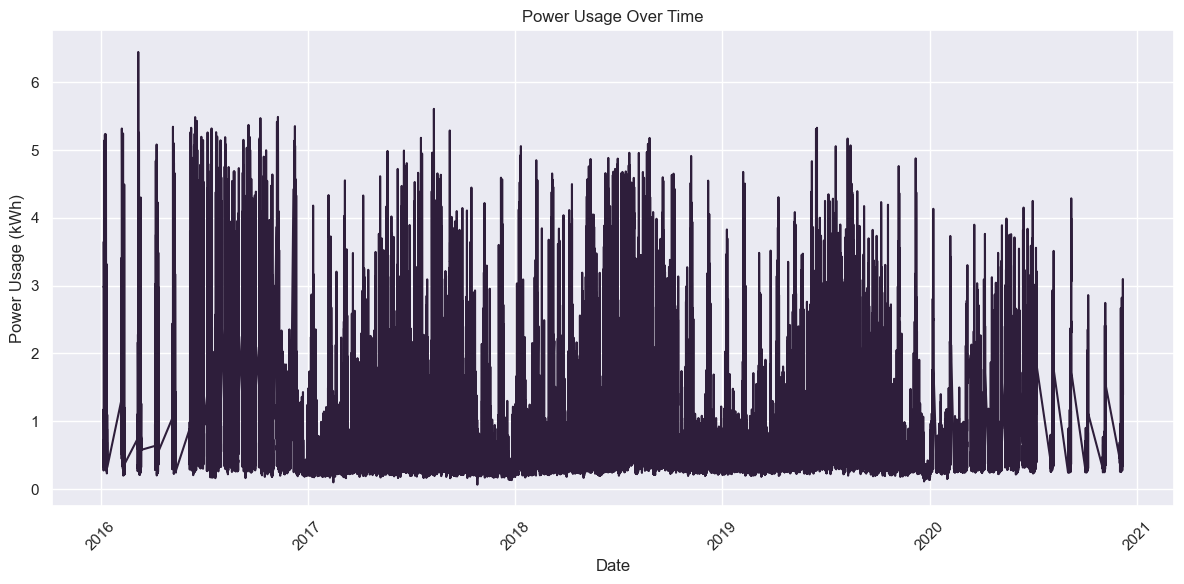

In [6]:
data['StartDate'] = pd.to_datetime(data['StartDate'])

plt.figure(figsize=(12, 6))

sns.lineplot(data=data, x='StartDate', y='Value (kWh)', ci=None)

plt.title('Power Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Power Usage (kWh)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

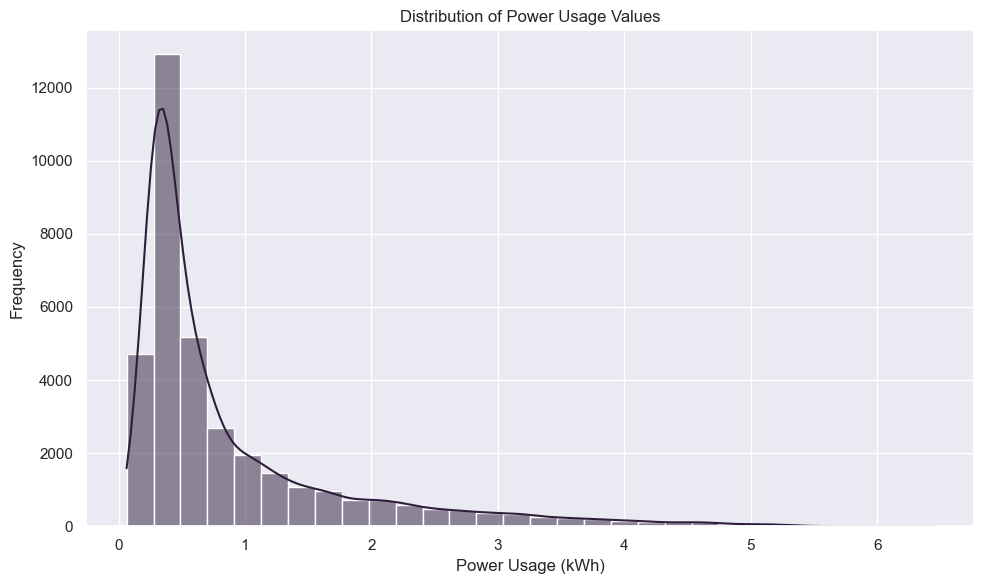

In [7]:
plt.figure(figsize=(10, 6))

sns.histplot(data['Value (kWh)'], kde=True, bins=30)

plt.title('Distribution of Power Usage Values')
plt.xlabel('Power Usage (kWh)')
plt.ylabel('Frequency')
plt.tight_layout()

plt.show()


/var/folders/p5/4gqxjwtd7k73wdww84v63q9c0000gn/T/ipykernel_77439/1418419827.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='DayName', y='Value (kWh)', ci=None, order=list(day_map.values()), palette="mako")


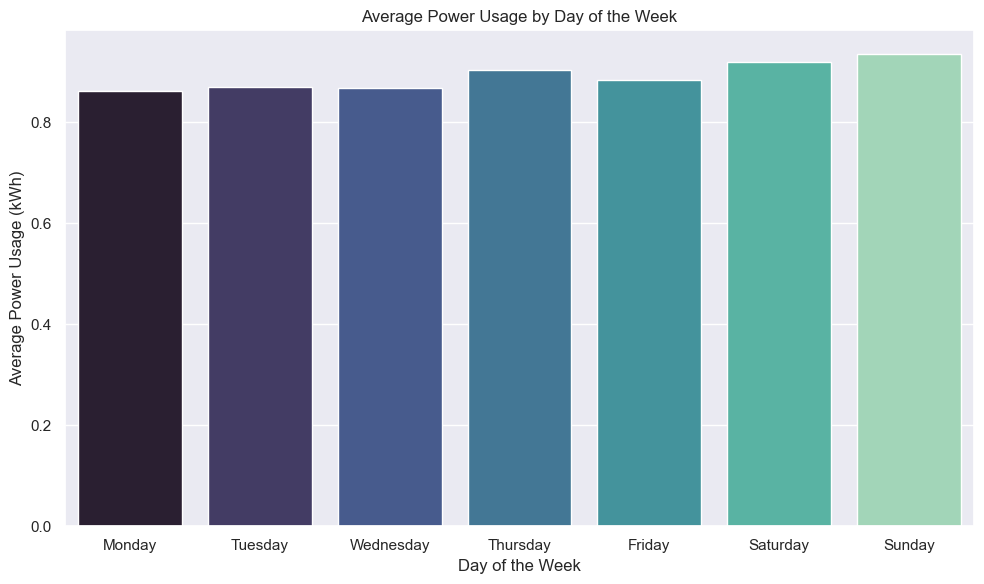

In [8]:
data = pd.read_csv(file_path)

plt.figure(figsize=(10, 6))

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
data['DayName'] = data['day_of_week'].map(day_map)

#colors = ["#3498db", "#e74c3c", "#2ecc71", "#f1c40f", "#1abc9c", "#9b59b6", "#34495e"]

sns.barplot(data=data, x='DayName', y='Value (kWh)', ci=None, order=list(day_map.values()), palette="mako")

plt.title('Average Power Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Power Usage (kWh)')
plt.tight_layout()

plt.show()

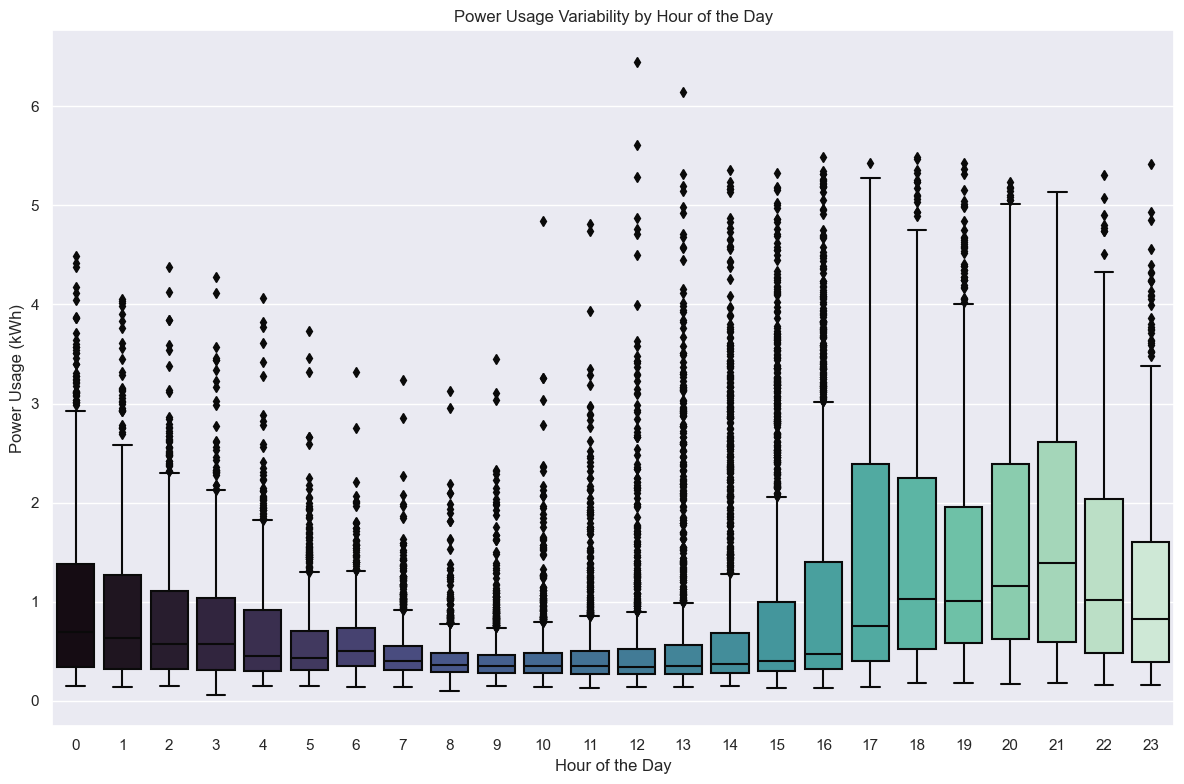

In [9]:
data = pd.read_csv(file_path)

data['Hour'] = pd.to_datetime(data['StartDate']).dt.hour

plt.figure(figsize=(12, 8))

palette = sns.color_palette("mako", 24)

sns.boxplot(data=data, x='Hour', y='Value (kWh)', palette=palette)

plt.title('Power Usage Variability by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Power Usage (kWh)')
plt.tight_layout()
plt.show()

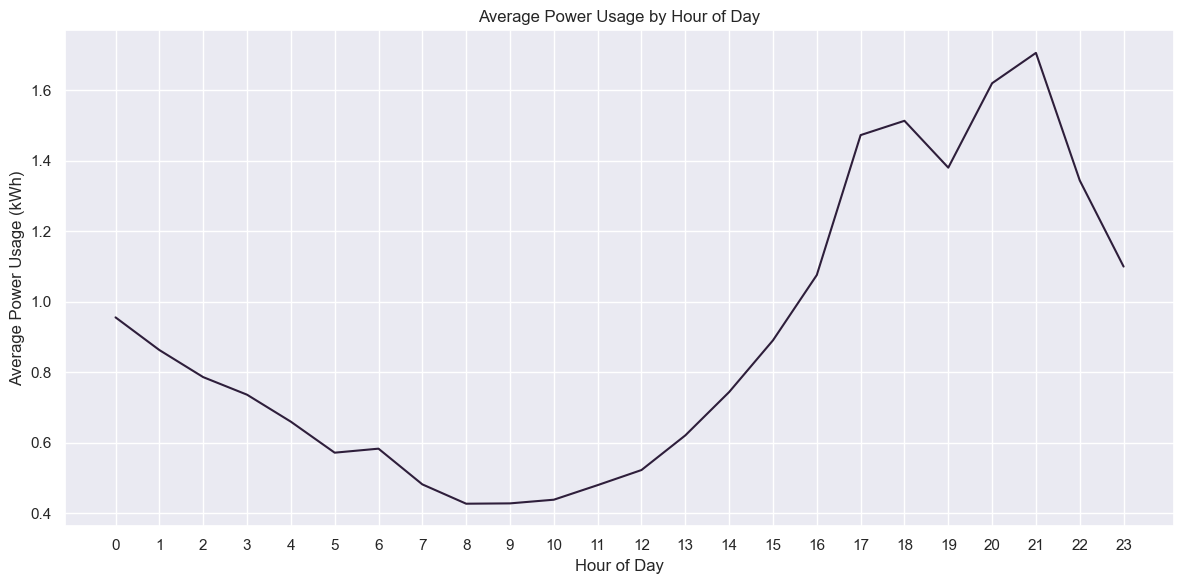

In [11]:
file_path = '/Users/yunustopcu/Documents/GitHub/predictive-solar-supply-chain/power_usage_2016_to_2020.csv'
data = pd.read_csv(file_path)

data['StartDate'] = pd.to_datetime(data['StartDate'])
data['Hour'] = data['StartDate'].dt.hour

hourly_averages = data.groupby('Hour')['Value (kWh)'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_averages, x='Hour', y='Value (kWh)')
plt.title('Average Power Usage by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Power Usage (kWh)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()

plt.show()

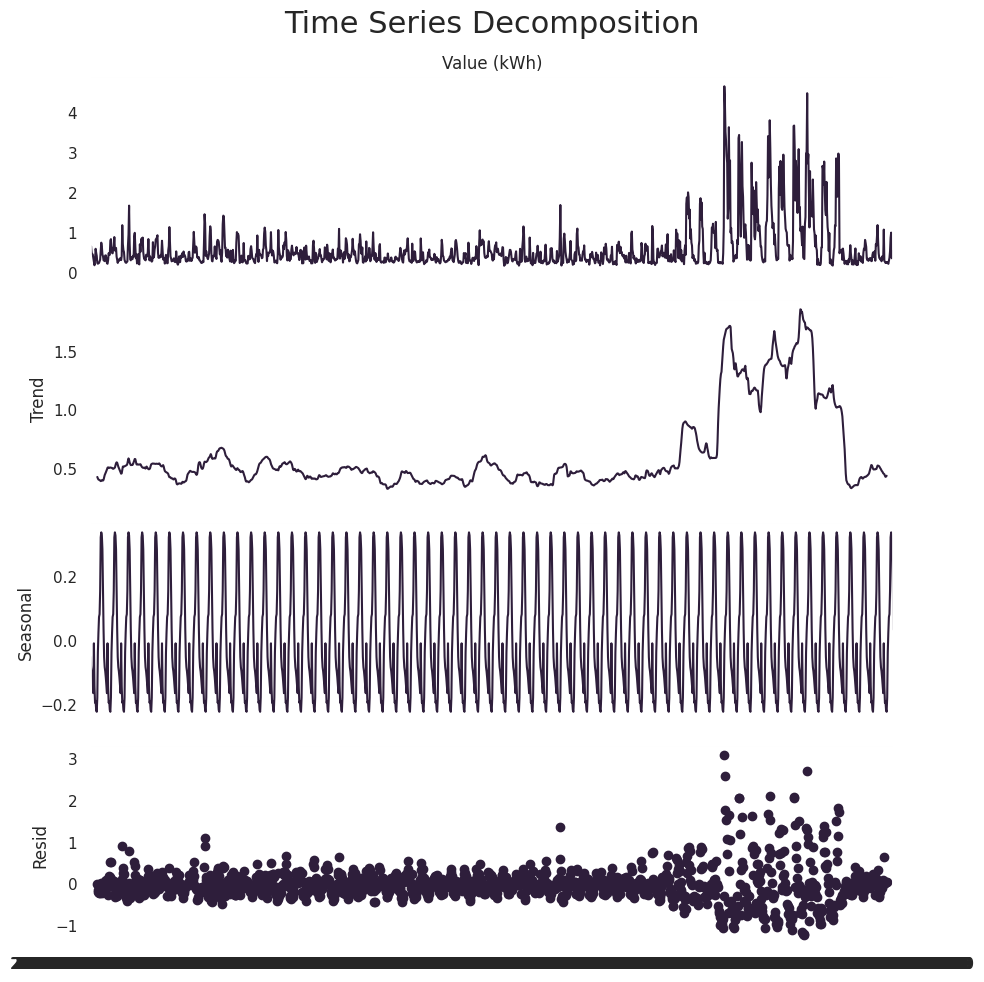

In [ ]:
data = pd.read_csv(file_path)


data_2019 = data[(data['StartDate'] >= '2019-01-01') & (data['StartDate'] < '2019-03-01')]
data_2019.set_index('StartDate', inplace=True)
decomposition = seasonal_decompose(data_2019['Value (kWh)'], model='additive', period=24)


plt.rcParams.update({'figure.figsize': (10,10)})
fig = decomposition.plot()
fig.suptitle('Time Series Decomposition', fontsize=22)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

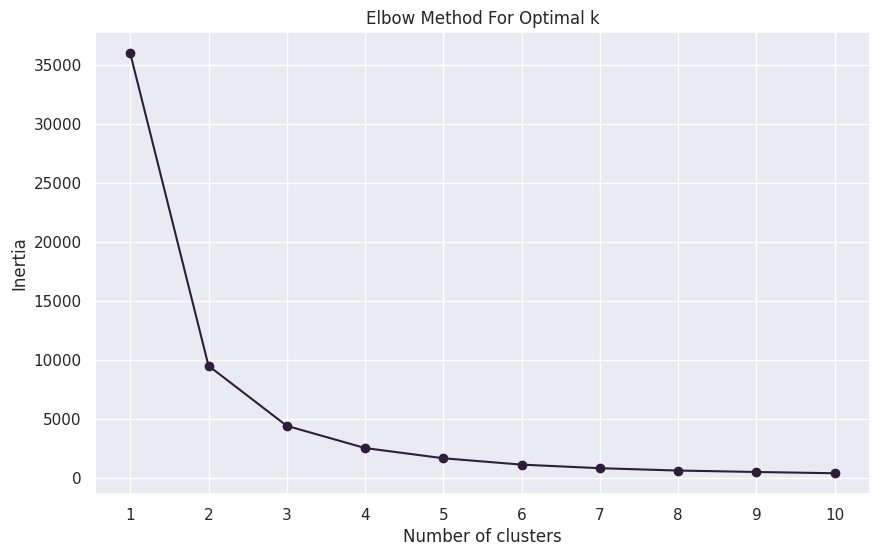

In [ ]:


data = pd.read_csv(file_path)
X = data[['Value (kWh)']].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


In [ ]:

iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=0)
iso_forest.fit(X_scaled)

anomalies = iso_forest.predict(X_scaled)

data['Anomaly'] = anomalies

anomaly_count = (data['Anomaly'] == -1).sum()

total_data_points = len(data)
anomaly_percentage = (anomaly_count / total_data_points) * 100

print(f"Number of anomalies detected: {anomaly_count}")
print(f"Percentage of anomalies: {anomaly_percentage:.2f}%")


Number of anomalies detected: 355
Percentage of anomalies: 0.99%


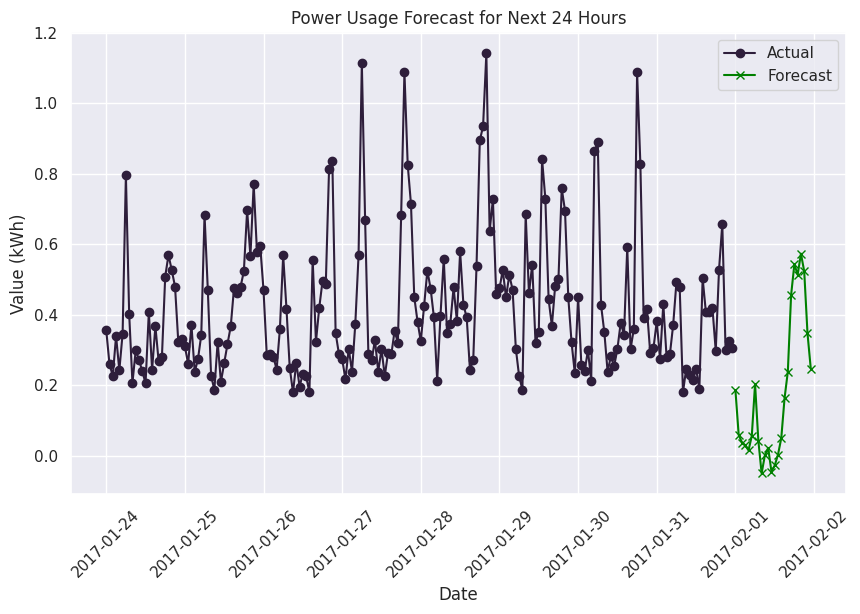

In [ ]:
data = pd.read_csv(file_path)


data['StartDate'] = pd.to_datetime(data['StartDate'])
data.set_index('StartDate', inplace=True)

start_date = '2017-01-01'
end_date = '2017-01-31'
jan_2017_data = data[start_date:end_date]

jan_2017_data = jan_2017_data.asfreq('H')

model = ExponentialSmoothing(jan_2017_data['Value (kWh)'], trend='add', seasonal='add', seasonal_periods=24)
fit_model = model.fit()

forecast = fit_model.forecast(24)

plt.figure(figsize=(10, 6))
plt.plot(jan_2017_data['Value (kWh)']['2017-01-24':], label='Actual', marker='o')
# Plotting the forecast with a specific color
plt.plot(pd.date_range(start='2017-02-01', periods=24, freq='H'), forecast, label='Forecast', marker='x', color='green')
plt.title('Power Usage Forecast for Next 24 Hours')
plt.xlabel('Date')
plt.ylabel('Value (kWh)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


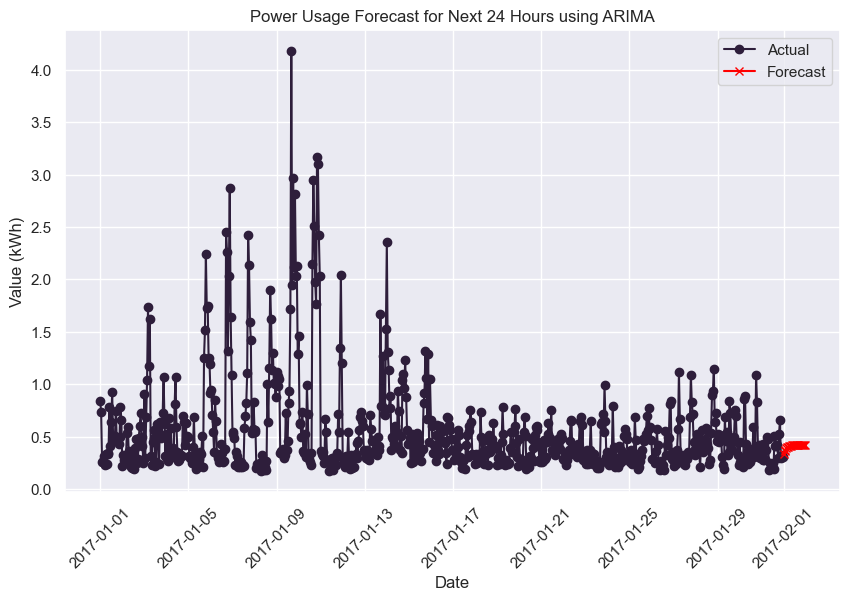

In [12]:
data = pd.read_csv(file_path)


data['StartDate'] = pd.to_datetime(data['StartDate'])
data.set_index('StartDate', inplace=True)

start_date = '2017-01-01'
end_date = '2017-01-31'
jan_2017_data = data[start_date:end_date]

jan_2017_data = jan_2017_data.asfreq('H')

# Here, we need to choose p, d, q for the ARIMA model.
# For simplicity, let's start with some arbitrary values, like p=1, d=1, q=1.
# You might need to adjust these based on your data's characteristics.
model = ARIMA(jan_2017_data['Value (kWh)'], order=(1, 1, 1))
fit_model = model.fit()

# Forecasting the next 24 hours
forecast = fit_model.forecast(24)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(jan_2017_data['Value (kWh)']['2017-01-24':], label='Actual', marker='o')
plt.plot(pd.date_range(start='2017-02-01', periods=24, freq='H'), forecast, label='Forecast', marker='x', color='red')
plt.title('Power Usage Forecast for Next 24 Hours using ARIMA')
plt.xlabel('Date')
plt.ylabel('Value (kWh)')
plt.legend()
plt.xticks(rotation=45)
plt.show()